# Regresión Lineal Múltiple
Los modelos lineales son una de las herramientas más importantes del análisis cuantitativo. Los utilizamos cuando queremos predecir –o explicar– una variable dependiente a partir de una o más variables independientes. El uso mismo de la terminología de variables dependientes e independientes nos da una pista del abordaje: el ajuste de modelos lineales busca encontrar una función –en el sentido matemático– que nos permite expresar a una variable a partir de otras.

### Autores
   * Efrén Jiménez

## Análisis del Problema
El desempeño de un automóvil se puede medir de diferentes formas. Algunas comunes son la cantidad de caballos de fuerza y el rendimiento del mismo, que se puede resumir en cuantas millas puede recorrer el automóvil por cada galón de combustible que consume. Para los clientes, potenciales compradores de un automóvil, este rendimiento es importante pues puede ayudar a tomar una decisión con respecto a cuál automóvil comprar (si, por ejemplo, el cliente quiere un auto que rinda por muchas millas y pueda economizar en la compra de combustible).

Desde este punto de vista, tanto a clientes como a fabricadores de automóviles, les conviene entender cuál es la relación entre diferentes características del automóvil y su rendimiento, pues el conocer estas relaciones les puede ayudar a inferir cuál va a ser la eficiencia del vehículo a partir de ver los valores de otras características. Para fabricantes, puede ser importante conocer estas relaciones para saber cómo hacer cada modelo más eficiente con respecto al anterior.

![Autos ROC](img/dataset-cover.jpg)

## Entendimiento de los Datos

Con el fin de analizar y tratar de estimar las millas por galón de diferentes modelos de automóviles, se trabajó con un conjunto de datos que contiene 398 observaciones y 9 variables:

- mpg (millas por galón): numérica, con un rango de 9 a 46.60.
- cyl (cilindraje): categórica ordinal, con valores posibles de 3, 4, 5, 6 y 8.
- disp (desplazamiento): numérica, con un rango de 68 a 455.
- hp (caballos de fuerza): numérica, con un rango de 46 a 230 y 6 valores faltantes.
- weight (peso): numérica, con un rango de 1613 a 5140.
- acc (aceleración): numérica, con un rango de 8 a 24.80.
- model year (año): categórica, con 13 valores diferentes representando el año del automóvil.
- origin (origen): categórica, 3 valores posibles: 1, 2, 3.
- model name (nombre del modelo): categórica, con 305 posibles valores.

## Exploración de los Datos

In [2]:
#librerías utilizadas
library(caTools)
library(ggplot2)
#Evitar mostrar warning messages
options(warn=-1)

#establezca el directorio de trabajo
#En caso de que el sitio este en algún directorio de la maquina
#setwd('auto-mpg.txt')

#cargue el archivo a una variable que se llame autos usando la función read.table
autos <- read.csv('auto-mpg_g.csv', header = T, na.strings = '?')

#autos <- read.csv('auto-mpg.csv', header = T, na.strings = '?')

#Ejemplo para cambiar el nombre de las columnas
colnames(autos) <- c('mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'model.year', 
                     'origin', 'model.name')

cor(autos[,1:7])

#Ejemplo para salvar el dataset 
#write.csv(autos, file = "MyData.csv",row.names=FALSE)

autos<-autos[,1:6]
autos<-auto[auto$mpg>15,]
#cambiar las variables que corresponden a numéricas
autos$mpg <- as.numeric(as.character(autos$mpg))
autos$disp <- as.numeric(as.character(autos$disp))
autos$hp <- as.numeric(as.character(autos$hp))
autos$weight <- as.numeric(as.character(autos$weight))
autos$acc <- as.numeric(as.character(autos$acc))

#Utilice la función str() para ver la estructura del conjunto de datos:
#str(autos)

#summary(autos)

#Dividir el conjunto de datos en uno de entrenamiento y otro de pruebas:
set.seed(1376)
splt <- sample.split(autos$mpg, SplitRatio = 0.7)
autos.entrenamiento <- autos[splt, ]
autos.prueba <- autos[!splt, ]

str(autos.entrenamiento)
str(autos.prueba)


,mpg,cyl,disp,hp,weight,acc,model.year
mpg,1.0000000,-0.7746012,-0.8033707,-0.7539849,-0.8309542,0.4014181,0.5816267
cyl,-0.7746012,1.0000000,0.9507216,0.8216564,0.8960168,-0.5045623,-0.3487458
disp,-0.8033707,0.9507216,1.0000000,0.8719301,0.9328224,-0.5430601,-0.3701814
hp,-0.7539849,0.8216564,0.8719301,1.0000000,0.8379867,-0.6662700,-0.4115875
weight,-0.8309542,0.8960168,0.9328224,0.8379867,1.0000000,-0.4119882,-0.3065643
acc,0.4014181,-0.5045623,-0.5430601,-0.6662700,-0.4119882,1.0000000,0.2551515
model.year,0.5816267,-0.3487458,-0.3701814,-0.4115875,-0.3065643,0.2551515,1.0000000


'data.frame':	275 obs. of  6 variables:
 $ mpg   : num  18 15 18 17 15 14 14 15 14 15 ...
 $ cyl   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp  : num  307 350 318 302 429 440 455 390 340 400 ...
 $ hp    : num  130 165 150 140 198 215 225 190 160 150 ...
 $ weight: num  3504 3693 3436 3449 4341 ...
 $ acc   : num  12 12 11 11 10 9 10 9 8 10 ...
'data.frame':	123 obs. of  6 variables:
 $ mpg   : num  16 14 15 24 21 10 17 14 13 18 ...
 $ cyl   : int  8 8 8 4 6 8 6 8 8 6 ...
 $ disp  : num  304 454 383 113 200 360 250 400 400 258 ...
 $ hp    : num  150 220 170 95 85 215 100 175 170 110 ...
 $ weight: num  3433 4354 3563 2372 2587 ...
 $ acc   : num  12 9 10 15 16 14 16 12 12 14 ...


>Es importante siempre validar los rangos de los conjuntos de datos creados, para evitar caer en extrapolación:

In [3]:
print(".................................Entrenamiento..................................")
summary(autos.entrenamiento)
print(".................................Pruebas........................................")
summary(autos.prueba)

[1] ".................................Entrenamiento.................................."


      mpg             cyl             disp             hp            weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   :  0.0   Min.   :1649  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:107.0   1st Qu.: 75.5   1st Qu.:2264  
 Median :23.00   Median :4.000   Median :151.0   Median : 92.0   Median :2855  
 Mean   :23.52   Mean   :5.498   Mean   :195.9   Mean   :103.5   Mean   :2999  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:302.0   3rd Qu.:130.0   3rd Qu.:3622  
 Max.   :47.00   Max.   :8.000   Max.   :455.0   Max.   :225.0   Max.   :5140  
      acc       
 Min.   : 8.00  
 1st Qu.:14.00  
 Median :15.00  
 Mean   :15.48  
 3rd Qu.:17.00  
 Max.   :25.00  

[1] ".................................Pruebas........................................"


      mpg             cyl             disp           hp            weight    
 Min.   :10.00   Min.   :3.000   Min.   : 71   Min.   :  0.0   Min.   :1613  
 1st Qu.:18.00   1st Qu.:4.000   1st Qu.: 98   1st Qu.: 74.5   1st Qu.:2162  
 Median :23.00   Median :4.000   Median :140   Median : 92.0   Median :2720  
 Mean   :23.66   Mean   :5.358   Mean   :188   Mean   :101.6   Mean   :2907  
 3rd Qu.:29.50   3rd Qu.:6.000   3rd Qu.:258   3rd Qu.:110.0   3rd Qu.:3530  
 Max.   :44.00   Max.   :8.000   Max.   :454   Max.   :230.0   Max.   :4952  
      acc      
 Min.   : 9.0  
 1st Qu.:14.0  
 Median :16.0  
 Mean   :16.2  
 3rd Qu.:18.0  
 Max.   :25.0  

De acuerdo con los resúmenes anteriores, hay algunas observaciones en el conjunto de datos de prueba cuyo rango de las variables disp y weight se extiende más allá del rango en el conjunto de datos de entrenamiento, así que vamos a eliminar esas observaciones del conjunto de datos de prueba.

In [4]:
print("Eliminar datos fuera de rango")
autos.prueba <- autos.prueba[autos.prueba$weight >= 1649 & autos.prueba$disp >= 70, ]
print(".................................Entrenamiento..................................")
summary(autos.entrenamiento)
print(".................................Pruebas........................................")
summary(autos.prueba)

[1] "Eliminar datos fuera de rango"
[1] ".................................Entrenamiento.................................."


      mpg             cyl             disp             hp            weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   :  0.0   Min.   :1649  
 1st Qu.:17.50   1st Qu.:4.000   1st Qu.:107.0   1st Qu.: 75.5   1st Qu.:2264  
 Median :23.00   Median :4.000   Median :151.0   Median : 92.0   Median :2855  
 Mean   :23.52   Mean   :5.498   Mean   :195.9   Mean   :103.5   Mean   :2999  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:302.0   3rd Qu.:130.0   3rd Qu.:3622  
 Max.   :47.00   Max.   :8.000   Max.   :455.0   Max.   :225.0   Max.   :5140  
      acc       
 Min.   : 8.00  
 1st Qu.:14.00  
 Median :15.00  
 Mean   :15.48  
 3rd Qu.:17.00  
 Max.   :25.00  

[1] ".................................Pruebas........................................"


      mpg             cyl             disp             hp            weight    
 Min.   :10.00   Min.   :3.000   Min.   : 71.0   Min.   :  0.0   Min.   :1773  
 1st Qu.:18.00   1st Qu.:4.000   1st Qu.: 98.0   1st Qu.: 75.0   1st Qu.:2166  
 Median :23.00   Median :4.000   Median :140.0   Median : 92.0   Median :2728  
 Mean   :23.57   Mean   :5.369   Mean   :188.9   Mean   :101.9   Mean   :2917  
 3rd Qu.:29.00   3rd Qu.:6.000   3rd Qu.:258.0   3rd Qu.:110.0   3rd Qu.:3532  
 Max.   :44.00   Max.   :8.000   Max.   :454.0   Max.   :230.0   Max.   :4952  
      acc       
 Min.   : 9.00  
 1st Qu.:14.00  
 Median :16.00  
 Mean   :16.19  
 3rd Qu.:18.00  
 Max.   :25.00  

En total, se eliminaron 2 observaciones.

Para trabajar con regresiones lineales, es importante trabajar solo con variables cuantitativas y estudiar las relaciones que hay entre ellas. Con esto en mente, podemos comenzar nuestra exploración creando gráficos de dispersión para ver cuál es la relación entre nuestra variable de interés (mpg) y el resto de las variables cuantitativas:

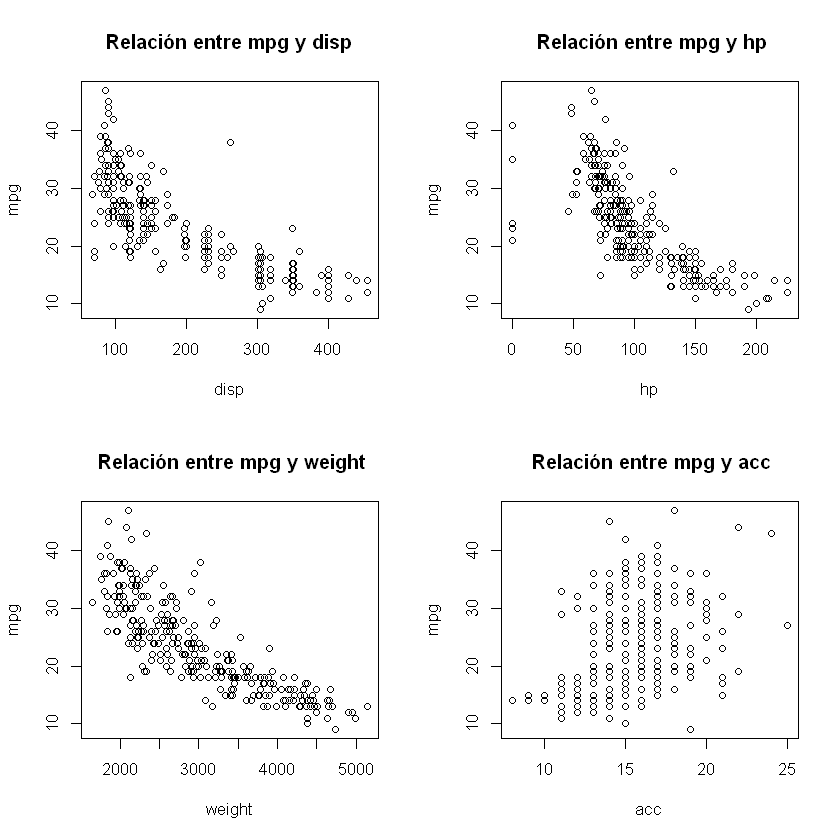

In [5]:
par(mfrow = c(2,2)) #crear una cuadrícula de 2 columnas y 2 hileras para ver cuatro gráficos.

plot(x = autos.entrenamiento$disp, y = autos.entrenamiento$mpg, main = 'Relación entre mpg y disp', ylab = 'mpg', xlab = 'disp')
plot(x = autos.entrenamiento$hp, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y hp', ylab = 'mpg', xlab = 'hp')
plot(x = autos.entrenamiento$weight, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y weight', ylab = 'mpg', xlab = 'weight')
plot(x = autos.entrenamiento$acc, y = autos.entrenamiento$mpg, main = ' Relación entre mpg y acc', ylab = 'mpg', xlab = 'acc')

En los gráficos creados anteriormente, podemos ver como si existe algún tipo de relación, aunque no sea exactamente lineal, entre mpg y las otras cuatro variables cuantitativas. De estas cuatro variables, la que parece tener menor relación es la variable acc con la variable mpg.

También es importante visualizar la relación entre las diferentes variables predictoras, para lo cual podemos crear una matriz de gráficos de dispersión:

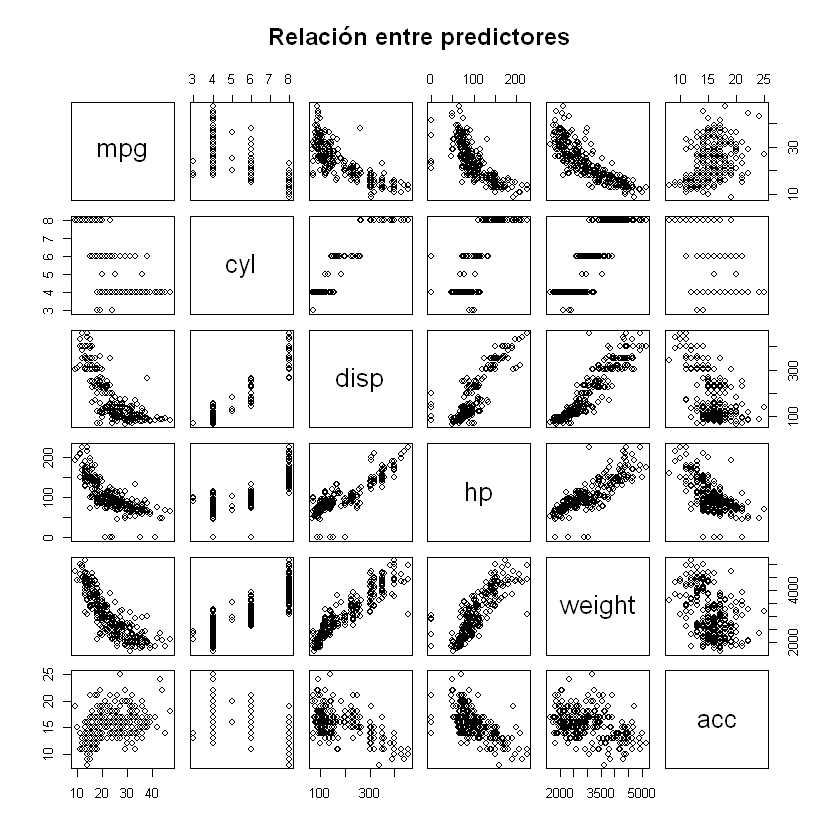

In [6]:
par(mfrow = c(1,1)) #volver a solo un gráfico por visualización.

pairs(autos.entrenamiento[!is.na(autos$hp), c(1,2,3,4,5,6)], main = 'Relación entre predictores')

La información del gráfico anterior podemos complementarla con una matriz de correlación:

In [7]:
cor(autos.entrenamiento[!is.na(autos.entrenamiento$hp),c(1,2,3,4,5,6)])

,mpg,cyl,disp,hp,weight,acc
mpg,1.0000000,-0.7729188,-0.7995689,-0.7548370,-0.8287319,0.3644897
cyl,-0.7729188,1.0000000,0.9516784,0.8231940,0.8947484,-0.5093245
disp,-0.7995689,0.9516784,1.0000000,0.8674060,0.9263308,-0.5410210
hp,-0.7548370,0.8231940,0.8674060,1.0000000,0.8256779,-0.6427702
weight,-0.8287319,0.8947484,0.9263308,0.8256779,1.0000000,-0.3801886
acc,0.3644897,-0.5093245,-0.5410210,-0.6427702,-0.3801886,1.0000000


Como pudimos apreciar en la matriz de gráficos de dispersión, y confirmar con la matriz de correlación, hay una correlación significativa entre los variables cly con (disp, hp, weight) y viceversa. La única variable que no tiene una correlación absoluta mayor a 0.75 es acc. Dado esto, debemos escoger una variable entre hp, disp y weight, para lo cual podemos crear una matriz de correlación entre esas tres variables y mpg para ver cuál tiene una correlación mayor con mpg:

In [8]:
cor(autos.entrenamiento[!is.na(autos.entrenamiento$hp),c(1,2,3,4,5)])

,mpg,cyl,disp,hp,weight
mpg,1.0000000,-0.7729188,-0.7995689,-0.7548370,-0.8287319
cyl,-0.7729188,1.0000000,0.9516784,0.8231940,0.8947484
disp,-0.7995689,0.9516784,1.0000000,0.8674060,0.9263308
hp,-0.7548370,0.8231940,0.8674060,1.0000000,0.8256779
weight,-0.8287319,0.8947484,0.9263308,0.8256779,1.0000000


Basándonos en la correlación absoluta, se va a escoger las variables cyl, disp, hp, weight para ser incluida en el modelo.

## Modelo de Minería de Datos

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [ ]:
install.packages('caTools')

In [13]:
reg.mpg <- lm(mpg ~ hp+weight+disp, data = autos.entrenamiento)

summary(reg.mpg)


Call:
lm(formula = mpg ~ hp + weight + disp, data = autos.entrenamiento)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5663  -2.7751  -0.3033   2.4244  16.5115 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.9338708  1.3899794  32.327  < 2e-16 ***
hp          -0.0378783  0.0130322  -2.907  0.00396 ** 
weight      -0.0054229  0.0008129  -6.671 1.43e-10 ***
disp        -0.0062907  0.0075084  -0.838  0.40287    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.287 on 271 degrees of freedom
Multiple R-squared:  0.7032,	Adjusted R-squared:  0.6999 
F-statistic:   214 on 3 and 271 DF,  p-value: < 2.2e-16


### Notas importantes

#### Nota:

Al realizar este análisis los parámetros de la ecuación de la recta de mínimos cuadrados que relaciona el número de metros de construcción con respecto a las millas por galon, para ello, se obtiene la recta Y = -0.0431473 * hp + -0.0059327 * weight  + 45.7758770 + 0.7024

![Summaryregresión lineal simple](img/summary_lm.png)

* Call: y muestra la formula con la que obtuvimos el modelo. Es útil para evitar confusiones, especialmente si estamos comparando varios modelos a la vez. Podemos saber exactamente a qué variables dependientes e independientes corresponde el sumario.
* Residuals: y nos da 5 estadísticos sobre la distribución de los residuos del modelo: valores mínimos, 1er, 2do y 3er cuartil y valor máximo. La media de los residuos siempre es cero, así que es un parámetro de referencia que no aparece en el sumario, pero que nos resulta útil. Si los residuos se distribuyen conforme a una distribución normal deberíamos esperar que la mediana sea 0 o muy cerca de 0, y que el 1er y 3er cuartil sean simétricos. Lo mismo para lo valores mínimos o máximos. Si hay desviaciones notables de media y mediana y no hay simetría entre cuartiles es muy probable que no estemos cumpliendo con algunos de los supuestos de los modelos lineales.
* Coefficients: y muestra los coeficientes estimados por el modelo, es decir, los parámetros ocultos β0 y β1 de la ecuación 1. Estas son la ordenada al origen (Intercept) y las pendientes estimadas para cada variable.
* Residual se registra el error estandar para la estimación de cada variable, al que podemos interpretar como el promedio de los residuos. A partir del coeficiente estimado y el error estándar se computa un valor t, un estadístico de la divergencia entre el estimado que produce el modelo y un estimado hipotético con valor 0. Cuanto más alto es el valor t mayor la divergencia entre los coeficientes del modelo y el coeficiente igual a cero. 
* El p-value de la prueba de hipótesis del estadístico t, que indica la probabilidad de obtener un estimado como el que obtuvimos si el coeficiente real fuera 0. Si la probabilidad de este evento es muy baja podemos rechazar la hipótesis de nulidad según la cuál el verdadero estimado es cero. Esto no significa que nuestro modelo sea verdadero, simplemente que es poco verosímil que obtuviéramos estos estimados siendo verdadero que la pendiente es 0. Si el p-value es alto (digamos, mayor que 0.05) no podemos rechazar la hipótesis de nulidad y deberíamos tratar a nuestro estimado como si fuera 0: la pendiente es horizontal, no hay diferencias significativas en los valores de y a medida que varía el valor de x.
* El error estándar de los residuos y los valores de R2, múltiple y ajustado. El R^2 de 0.6931 indica el modelo explica un 69.31% de la varianza de la variable dependiente. El resto de la varianza puede atribuirse al azar o a otras variables que no hemos incorporado al modelo.
*El estadístico F y el p-value correspondiente. El estadístico F considera a la varianza explicada y la no explicada y es la base de una prueba de hipótesis en la que contrasta a nuestro modelo con uno hipotético en el que las variables no tienen efectos, es decir, con todos los coeficientes iguales a 0. Si el p-value del estadístico F es menor a cierto criterio –usualmente menor que 0.05– podemos rechazar esta hipótesis de nulidad.

En el resumen del modelo, podemos ver que ambas variables son significativas y que el modelo creado explica alrededor de un 70% de la variación en la variable de respuesta (mpg). Asimismo, podemos ver que el modelo es mejor que un modelo sin variables. Con este modelo, procedemos a hacer las predicciones sobre el conjunto de datos de prueba.

## Evaluación

Se realiza una evaluación de los residuos de la regresión lineal.

### Residuos normales
![Residuos normales](img/summary_resi.png)
### Residuos anormales
![Residuos anormales](img/summary_resi_ano.png)

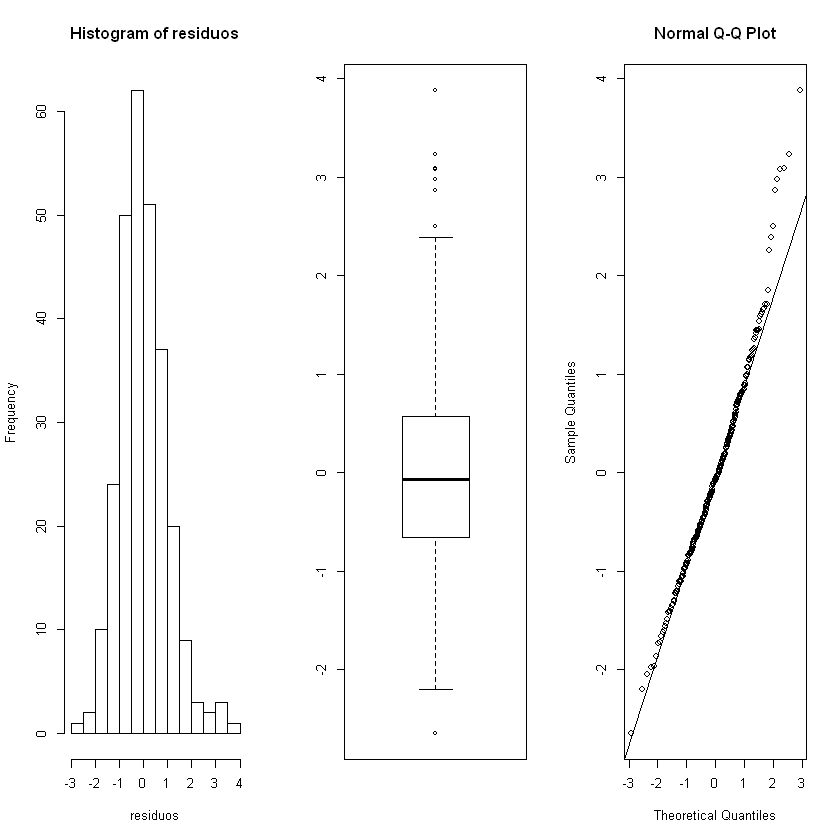

In [15]:
residuos<-rstandard(reg.mpg) # residuos estándares del modelo ajustado (completo) 
par(mfrow=c(1,3)) # divide la ventana en una fila y tres columnas 
hist(residuos) # histograma de los residuos estandarizados 
boxplot(residuos) # diagrama de cajas de los residuos estandarizados 
qqnorm(residuos) # gráfico de cuantiles de los residuos estandarizados 
qqline(residuos)  
par(mfrow=c(1,1)) # devuelve la pantalla a su estado original

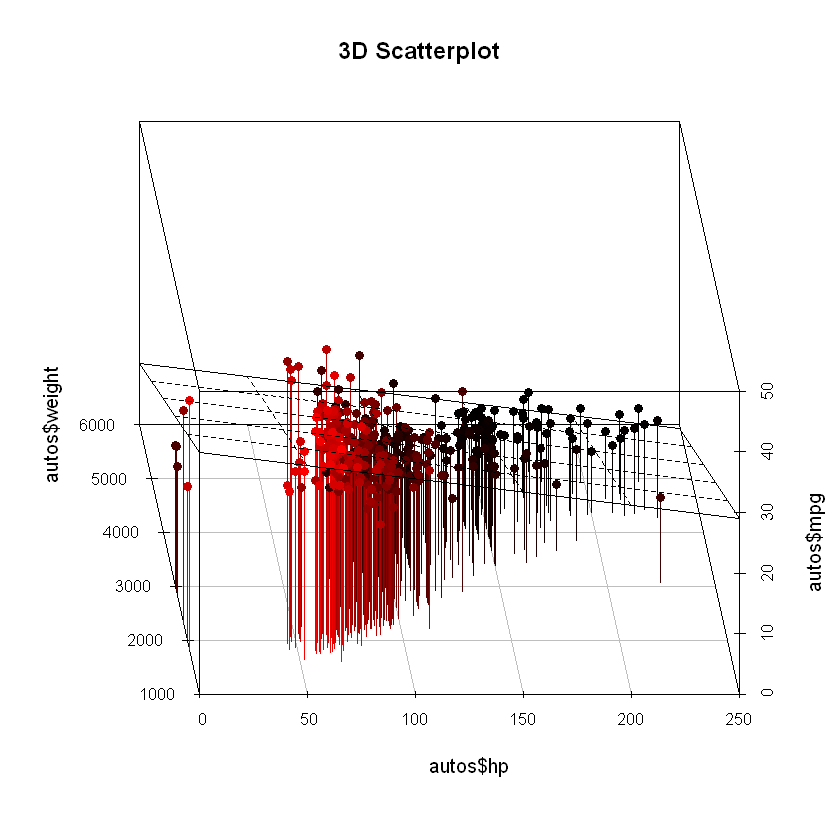

In [24]:
library("scatterplot3d")
library(rgl)
s3d<-scatterplot3d(autos$hp, autos$weight,autos$mpg,  pch=16, highlight.3d = TRUE, type="h",main="3D Scatterplot", angle = 100)
#s3d$plane3d(reg.mpg)
s3d$plane3d(reg.mpg, lty.box = "solid")


In [14]:
hist(autos.prueba$mpg - autos.prueba$Prediccion, 
     breaks = 50,
     main = 'Distribución de los Residuos en Prueba',
     xlab = 'residuos')


ERROR: Error in hist.default(autos.prueba$mpg - autos.prueba$Prediccion, breaks = 50, : character(0)


In [26]:
plot(y = autos.prueba$mpg - autos.prueba$Prediccion,
     x = autos.prueba$mpg,
     main = 'Distribución de los residuos por mpg',
     xlab = 'mpg',
     ylab = 'residuos')

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


Se realizará el proceso para obtener valores de predicción a partir del modelo de regresión lineal multiple generado.

In [53]:
autos.prueba$Prediccion <- predict(reg.mpg, newdata = autos.prueba)
str(autos.prueba)

autoss<-autos.prueba[autos.prueba$mpg>=autos.prueba$Prediccion,]
autoss

autoss2<-autos.prueba[autos.prueba$mpg<=autos.prueba$Prediccion,]
str(autoss2)


'data.frame':	123 obs. of  7 variables:
 $ mpg       : num  16 14 15 24 21 10 17 14 13 18 ...
 $ cyl       : int  8 8 8 4 6 8 6 8 8 6 ...
 $ disp      : num  304 454 383 113 200 360 250 400 400 258 ...
 $ hp        : num  150 220 170 95 85 215 100 175 170 110 ...
 $ weight    : num  3433 4354 3563 2372 2587 ...
 $ acc       : num  12 9 10 15 16 14 16 12 12 14 ...
 $ Prediccion: num  18.9 10.5 17.3 27.6 26.8 ...


,mpg,cyl,disp,hp,weight,acc,Prediccion
7,14,8,454,220,4354,9,10.452448
26,10,8,360,215,4615,14,9.119747
39,14,8,400,175,4464,12,11.741480
43,13,8,400,170,4746,12,10.284192
54,35,4,72,69,1613,18,33.229251
64,15,8,318,150,4135,14,14.772024
90,12,8,429,198,4952,12,7.853929
94,13,8,440,215,4735,11,8.407822
116,16,8,400,230,4278,10,10.471861
144,32,4,83,61,2003,19,31.260673


'data.frame':	77 obs. of  7 variables:
 $ mpg       : num  16 15 24 21 17 18 18 28 31 27 ...
 $ cyl       : int  8 8 4 6 6 6 6 4 4 4 ...
 $ disp      : num  304 383 113 200 250 258 250 116 71 97 ...
 $ hp        : num  150 170 95 85 100 110 88 90 65 60 ...
 $ weight    : num  3433 3563 2372 2587 3329 ...
 $ acc       : num  12 10 15 16 16 14 15 14 19 19 ...
 $ Prediccion: num  18.9 17.3 27.6 26.8 21.7 ...


In [1]:
valoresApredecir <- data.frame(hp=103, weight=2999)
valoresApredecir.prediccion <-predict(reg.mpg, newdata = valoresApredecir)
valoresApredecir.prediccion

ERROR: Error in predict(reg.mpg, newdata = valoresApredecir): objeto 'reg.mpg' no encontrado


## Resultados
De acuerdo con la evaluación hecha, el modelo solo predice un 70% de la variabilidad de los datos, por lo cual no se recomienda su uso en ambientes donde se necesite una precision mas alta. Debe mejorar la calidad de los datos debido a que muchos de estos datos no tienen una alta correlacion entre si, que permita subir el rango de predicción de los datos.